>> ## Quantitative analysis for AMZN

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('../../')


>>> #### Load data

In [2]:
data = pd.read_csv("./data/yfinance_data/AMZN_historical_data.csv")

In [3]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0
5,1997-05-22,0.071875,0.072396,0.065625,0.069792,0.069792,235536000,0.0,0.0
6,1997-05-23,0.070313,0.076042,0.066667,0.075000,0.075000,318744000,0.0,0.0
7,1997-05-27,0.075521,0.082292,0.072917,0.079167,0.079167,173952000,0.0,0.0
8,1997-05-28,0.081250,0.081771,0.076563,0.076563,0.076563,91488000,0.0,0.0
9,1997-05-29,0.077083,0.077083,0.073958,0.075260,0.075260,69456000,0.0,0.0


>>> ##### Ensure your data includes columns like Open, High, Low, Close, and Volume.

In [4]:
from scripts.validateColumn import validate_columns
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Validate dataset
try:
    validate_columns(data, required_columns)
    print("All required columns are present.")
except ValueError as e:
    print(e)

All required columns are present.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6846 non-null   object 
 1   Open          6846 non-null   float64
 2   High          6846 non-null   float64
 3   Low           6846 non-null   float64
 4   Close         6846 non-null   float64
 5   Adj Close     6846 non-null   float64
 6   Volume        6846 non-null   int64  
 7   Dividends     6846 non-null   float64
 8   Stock Splits  6846 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 481.5+ KB


In [6]:
from scripts.calculateTechnicalIndicator import calculate_ema
from scripts.calculateTechnicalIndicator import calculate_sma
from scripts.calculateTechnicalIndicator import calculate_rsi
from scripts.calculateTechnicalIndicator import calculate_macd

>>> #####   Calculate Simple Moving Average (SMA).

In [ ]:
data['SMA_20'] = calculate_sma(data, column='Close', period=20)

>>> #####  Calculate Exponential Moving Average (EMA)

In [8]:

data['EMA_20'] = calculate_ema(data, column='Close', period=20)

>>> ##### Calculate Relative Strength Index (RSI).

In [10]:

data['RSI'] = calculate_rsi(data, column='Close', period=14)

>>> #####  Calculate Moving Average Convergence Divergence (MACD).

In [11]:
data['MACD'], data['Signal'], data['Hist'] = calculate_macd(data, column='Close')

In [12]:
from scripts.plot import plot_stock_price
from scripts.plot import plot_rsi
from scripts.plot import plot_macd

>>> ##### stock price with SMA and EMA

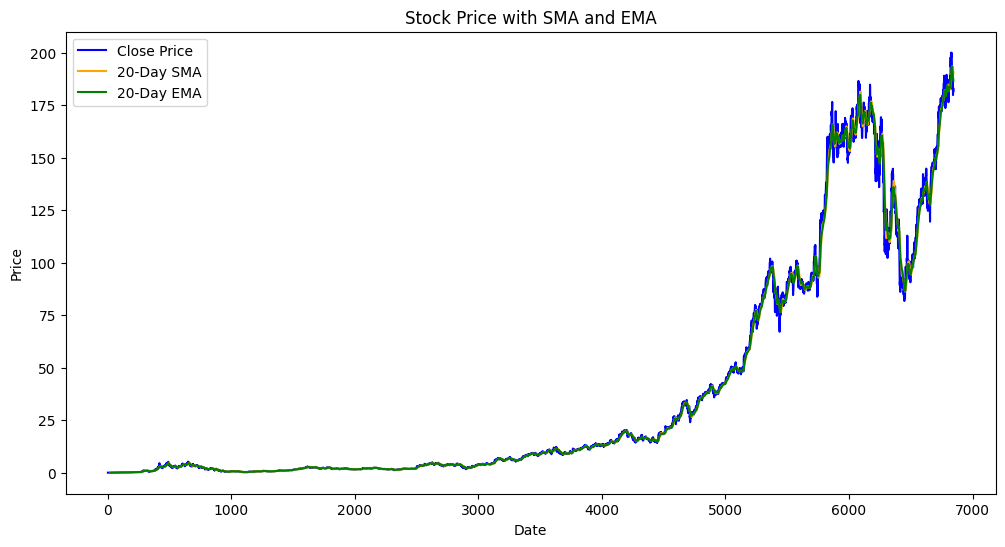

In [13]:
plot_stock_price(data, title='Stock Price with SMA and EMA')

>>> ##### RSI for Stock Prices

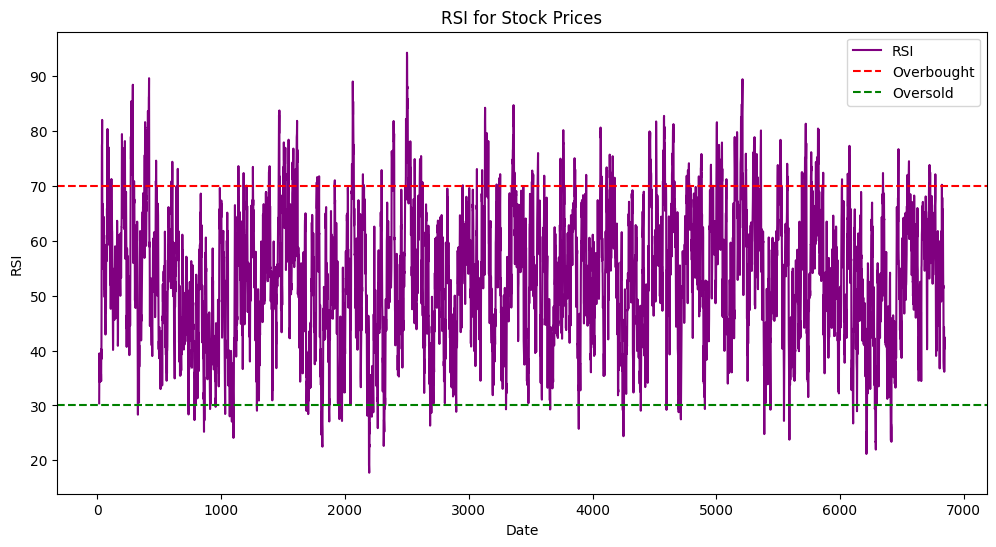

In [14]:
plot_rsi(data, title='RSI for Stock Prices')

>>> ##### MACD Analysis

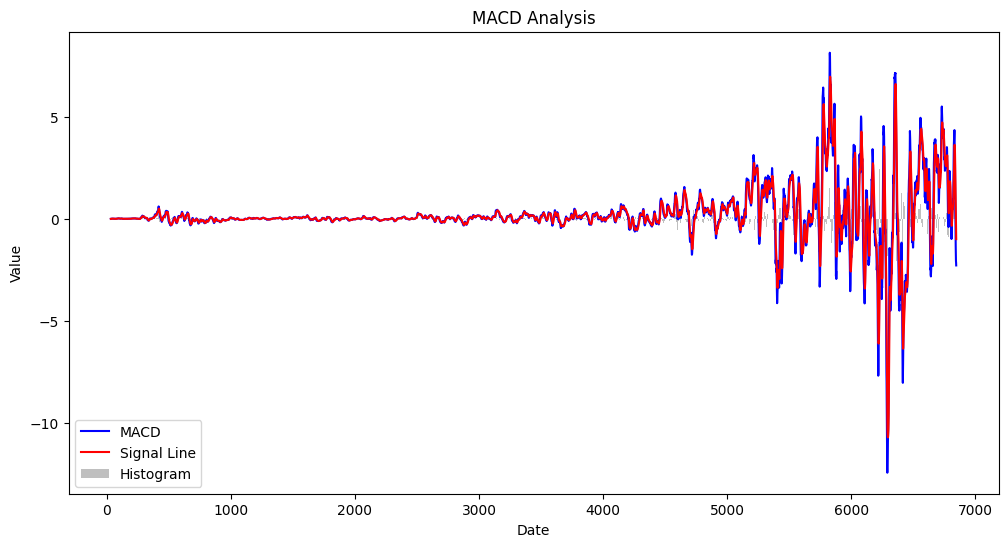

In [15]:
plot_macd(data, title='MACD Analysis')